#Perkenalan

In [ ]:
'''
Nama : Ahmad Qais
Batch : RMT - 026
Objecktif :

1. Mengambil data dari SQL database.
2. Menerapkan konsep central tendency.
3. enerapkan konsep distribusi data.
4. Menerapkan konsep extreme value analysis.
5. Konsep statistik deskriptif.
6. Membuat API sederhana dengan FastAPI
'''

# Setup

In [1]:
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "river-nation-405906"
client = bigquery.Client(project=project_id)

Authenticated


* Pilih HANYA kolom trip_seconds
* Pilih data dengan value tipe paymentnya bukan 'Unknown' (informasi tipe payment ada di kolom payment_type)
* Batasi data yang diambil sebanyak 5000 entry




In [40]:
# Cek nilai unik dari payment_type. Karena tidak ada
import pandas as pd

df = client.query('''SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
# WHERE payment_type <> Unknown
LIMIT 5000
'''
).to_dataframe()

df

unique = df['payment_type'].unique()
unique



array(['Cash', 'Credit Card'], dtype=object)

KNOWLEDGE: Tidak ada ***value Unknown*** di dalam data. Jadi WHERE payment_type <> Unknown DIBUAT MENJADI COMMENT

In [41]:
# Cek nilai unik dari payment_type. Karena tidak ada
data = client.query('''SELECT trip_seconds
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
# WHERE payment_type <> Unknown
LIMIT 5000
'''
).to_dataframe()

data



,trip_seconds
0,274
1,840
2,3
3,1320
4,283
...,...
4995,540
4996,540
4997,360
4998,900


# Soal

## 1a.
Lakukan perhitungan central tendency (mean, median, modus) terhadap data sebelum dideteksi adanya anomali.

In [56]:
# Menghitung mean dengan membuat desimal 2 angka di belakang koma
mean_trip_seconds = '{:.2f}'.format(data['trip_seconds'].mean())
print(f"nilai mean adalah: {mean_trip_seconds}")


nilai mean adalah: 973.80


In [57]:
# Menghitung median dengan membuat desimal 1 angka di belakang koma
median_trip_seconds = '{:.1f}'.format(data['trip_seconds'].median())
print(f"nilai median adalah: {median_trip_seconds}")


nilai median adalah: 780.0


In [58]:
# Menghitung mode
mode_trip_seconds = data['trip_seconds'].mode().values[0]
print(f"modus dari data: {mode_trip_seconds}")


modus dari data: 600


## 2a.
Cek skewness data untuk mengetahui apakah data terdistribusi normal atau tidak.

In [61]:
# Menghitung Skewness
skewness_trip_seconds = '{:.2f}'.format(data['trip_seconds'].skew())
print(f"skewness dari data ini adalah: {skewness_trip_seconds}")


skewness dari data ini adalah: 13.12


## 3a.
Lakukan pengolahan data dengan menggunakan extreme value analysis.

In [68]:
# Extreme Value Analysis Tukey’s Rule

q1 = data['trip_seconds'].quantile(0.25)
q2 = data['trip_seconds'].quantile(0.5)
q3 = data['trip_seconds'].quantile(0.75)

iqr = q3 - q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 2665.00
Lower Boundary: -927.00


## 4a.
Buat variabel baru yang menyimpan data yang sudah dibuang data anomalinya.

In [76]:
new_data = data[(data['trip_seconds'] >= low_bound) & (data['trip_seconds'] <= up_bound)]

#                  up_bound = q3 + 1.5*iqr
# low_bound = q1 - 1.5*iqr

# print(f'Upper Boundary: {up_bound:.2f}' )
# print(f'Lower Boundary: {low_bound:.2f}')
print(f"berikut adalah data terbaru setelah dibuang outliernya: \n \n {new_data}")

berikut adalah data terbaru setelah dibuang outliernya: 
 
       trip_seconds
0              274
1              840
2                3
3             1320
4              283
...            ...
4995           540
4996           540
4997           360
4998           900
4999           960

[4796 rows x 1 columns]


In [83]:
# Menghitung Skewness Setelah Anomali (outliers) dihapus
skewness_new_data = '{:.2f}'.format(new_data['trip_seconds'].skew())
print(f"skewness dari data baru ini adalah: {skewness_new_data} \ndimana sebelumnya adalah {skewness_trip_seconds}")


skewness dari data baru ini adalah: 0.77 
dimana sebelumnya adalah 13.12


## 5a.
Simpan data yang sudah dibuang anomalinya ke file csv dengan nama file <nama-student>.csv

In [82]:
new_data.to_csv('Ahmad_Qais.csv')

## 1-3b.
Please refer to file Ahmad-Qais.py


## 1c.
Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!

Jawaban: Sebelum dihilangkan outlier terlihat bahwa skew dari data adalah 13.12. Dimana berdasarkan teori yang dipelajari di Lecture:

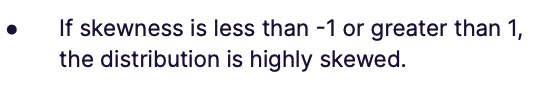

angka tersebut menujukkan banyaknya data outliers





## 2c.
Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!

Seperti dijelaskan sebelumnya. Data tersebut ***Highly Skewed*** dengan nilai 13.12

## 3c.
Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!

Saya menggunakan teknik Tukey’s Rule

dengan mencari q1 dan q3 terlebih dahulu
